[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/niteshjindal170988/unsupervised-learning/blob/main/clustering/principal_component_analysis_digit_recognizer.ipynb)

# Imports

In [4]:
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import math
from copy import deepcopy
import warnings
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs
import os
warnings.filterwarnings("ignore")
#os.getcwd()

In this exercise, we will study Principal Component Analysis and will apply it on  [Digit Recognizer Dataset](https://www.kaggle.com/c/digit-recognizer).

Before heading to the code section, we will first understand what PCA does.

**Principal Component Analysis** projects the column or dimensions (in $R^n$ space) into projected space.
In the below image, we have a source of light, data and the shadows (i.e. projection) -

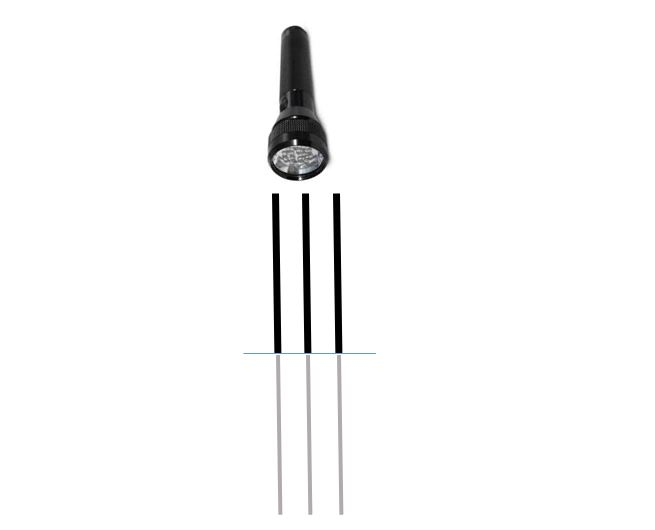


The best projection can be seen for image A because the **loss of information in projected space** is minimum-

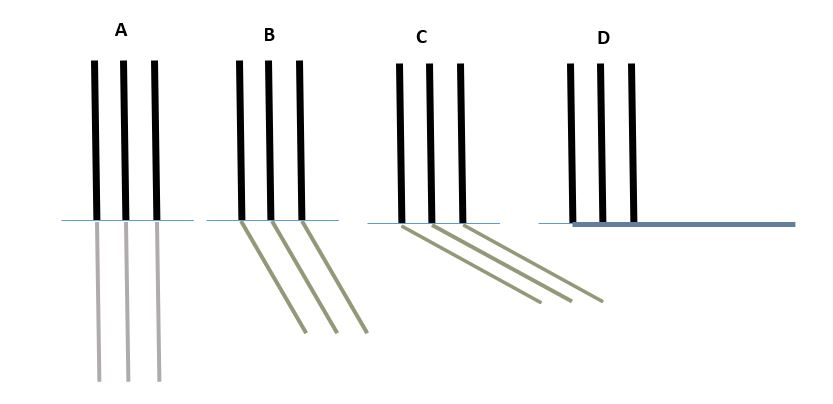

The metric or our objective is to **minimize the loss of information in the projected space**.

In the circular spread of data, direction of projection does not matter because the loss of information is same regardless of the direction in which we project the data to.

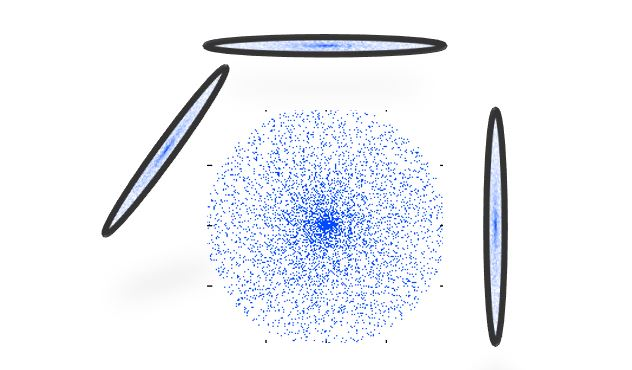


In the shape of data is as given in below image, direction 3 and direction 2 are the best projection which captures maximum information. 

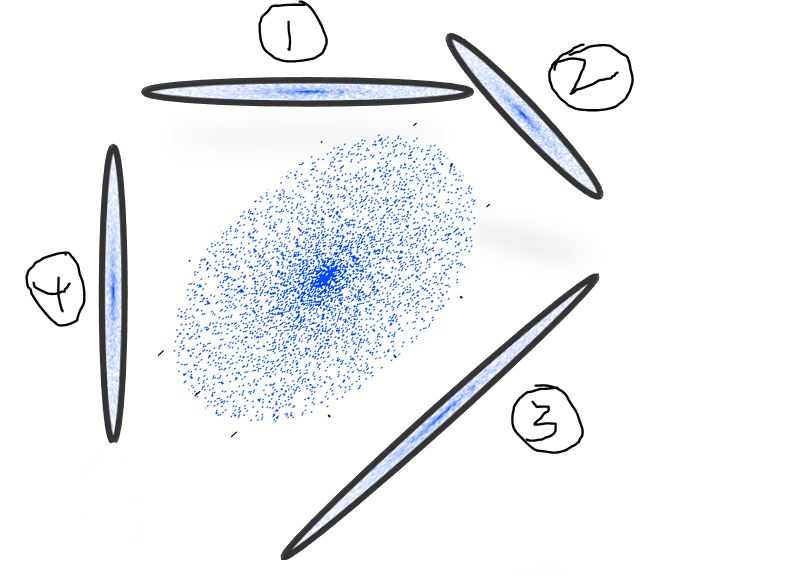 

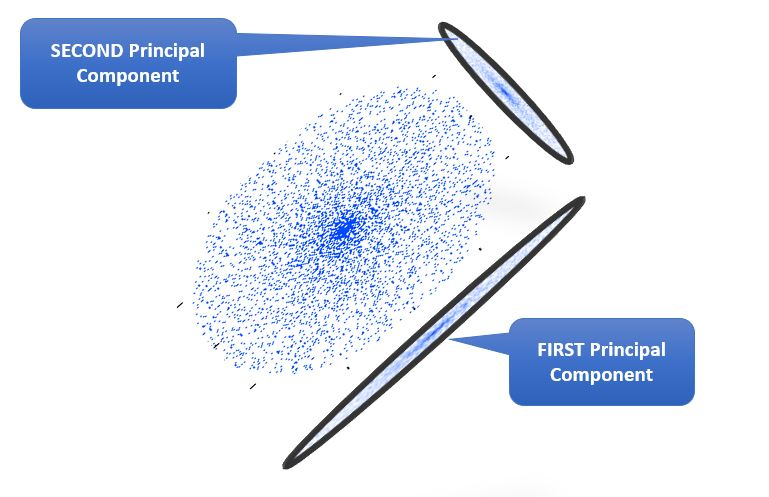

**Formulation** 

We will derive a notion of loss of information in the projected space. 
Let us say that  $x_1^{\left[1\right]},\ x_2^{\left[1\right]} … x_D^{\left[1\right]}$  be the 1st data point (in D- dimensional space) and $\omega_1,\ \omega_2,\ \omega_{3\ \ }.....\ \omega_D$ be the direction of projection, then the linear combination i.e. $x_1^{\left[1\right]}\omega_1+x_2^{\left[1\right]}\omega_1+\cdots\omega_Dx_D^{\left[2\right]}$ gives us a scaler value (i.e. projected value). The scaler value is the projection of first data point $x_1^{\left[1\right]},\ x_2^{\left[1\right]} … x_D^{\left[1\right]}$  along the direction $\omega_1,\ \omega_2,\ \omega_{3\ \ }.....\ \omega_D$. 


So, we can say that the projection of a d-dimensional data point $x^{\left(n\right)}=\omega^Tx^{\left(n\right)}=y^{\left(n\right)}$.(a scaler value)

Similarly, **mean of the data in the projected space** would be: 
$\mu_y=\sum_{n=1}^{n}y^{\left(n\right)}=\sum_{n=1}^{n}{\omega^Tx^{\left(n\right)}}$

Each data point or a row in data, which is a d-dimensional vector in the original space, gets projected into the projected space.
The idea of information is equal to [variance](https://en.wikipedia.org/wiki/Variance). If, in a dataset, all the columns have constant values, then there is no information gain because every data point would be the same.


**Variance in the Projected Space ** 

$\mu_p$ = Mean in the projected space

$x^{\left(n\right)}$ = nth data point in the original space

$y^{\left(n\right)}$ = nth data point in the projected space

$\mu_o$ = Mean in the original space

$\sigma_p^2$ = Variance in the projected space


$\sigma_p^2\ =\ \frac{1}{N}\sum_{n=1}^{N}{\left(y^{\left(n\right)}\ -\ \mu_p\right)^2\ \ \ \ \ }$

=  $\ \frac{1}{N}\sum_{n=1}^{N}{\left({\omega^Tx}^{\left(n\right)}\ -\ \omega^T\mu_o\right)^2\ \ \ \ \ }$

=  $\ \frac{1}{N}\sum_{n=1}^{N}{{{{\omega^T(x}^{\left(n\right)}\ -\ \mu_o)(x}^{\left(n\right)}\ -\ \mu_o)}^T\omega\ \ \ }$

=  $\frac{1}{N}\sum_{n=1}^{N}{{{{\omega^T(x}^{\left(n\right)}\ -\ \mu_o)(x}^{\left(n\right)}\ -\ \mu_o)}^T\omega\ \ \ }$

=  $\omega^T(\ \frac{1}{N}\sum_{n=1}^{N}{{{{(x}^{\left(n\right)}\ -\ \mu_o)(x}^{\left(n\right)}\ -\ \mu_o)}^T\ )\ \omega\ \ \ }$

= $w^TC\ \omega$

Find the w that maximizes   $\ \frac{1}{N}\sum_{n=1}^{N}\left({\omega^Tx}^{\left(n\right)}\ -\ \omega^T\mu_o\right)^2$. `w` is the direction where we project the data and obtain the maximum variance in projected space.

The `w`  is the best angle which minimizes the loss of information in the covariance matrix `C` of the data. 

The w can be computed as:
$w*$ = argmax  $w^TC\ \omega$ =  Eigen Vector (C ) 
We take the covariance matrix of the data and take the first eigen vector of that matrix. 


# PCA on the Digit-Recognizer Data -

## Download Data set from Google Drive


In [5]:
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-api-python-client==2.22.0
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org google-auth google-auth-oauthlib google-auth-httplib2
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.2.0
import gdown
warnings.filterwarnings("ignore")

# Load digit-recognizer (Train Data)
url = 'https://drive.google.com/uc?id=1SfSO5ZloHH3W6GJa5rfy9-qwjG4YPbM4'
output = 'train.csv'
gdown.download(url, output, quiet=False, verify=False)

You should consider upgrading via the 'c:\users\ag89382\appdata\local\programs\python\python37\deepenv\scripts\python.exe -m pip install --upgrade pip' command.


Downloading...
From: https://drive.google.com/uc?id=1SfSO5ZloHH3W6GJa5rfy9-qwjG4YPbM4
To: C:\Users\AG89382\AppData\Local\Programs\Python\Python37\deepenv\tutorials\unsupervised-learning\dimensionality-reduction\train.csv
100%|█████████████████████████████████████████████████████████████████████████████| 76.8M/76.8M [00:04<00:00, 16.4MB/s]


'train.csv'

# Read Dataset

In [6]:
data = pd.read_csv("train.csv")
data.head() #  Digits / Pixel data



label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

The data set-`train.csv` has 785 columns. The first column, called `label`, which is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
There are 10 labels (0 to 9).

Let's get started!

# Define a Class PCA to get the Projections

In [7]:

class PCA:
    col_num_with_labels=0 # global variable
    def __init__(self, df, col_num_with_labels):
        '''
        Declare instance variables
        '''
        self.df=df  
        self.col_num_wth_lbl=col_num_with_labels
        self.labels = pd.Series(self.df.iloc[:,self.col_num_wth_lbl]).unique() #unique target labels 
#         print(self.labels)
        
    def subset_data(self, uniq_trgt_lbl):
        
        '''
        Takes an integer value as an input (numeric category label).
        Returns-
        (1) Pandas Dataframe which is scaled subset of data without labels 
        (2) Pandas Series of Labels 
        Standard Scaler returns values with zero mean and unit variance.
        '''
        
        subdf=self.df[self.df.iloc[:,self.col_num_with_labels] == self.labels[uniq_trgt_lbl]]
        subset_label = subdf.iloc[:,self.col_num_with_labels]
        subset_data = subdf.drop(subdf.iloc[:,self.col_num_with_labels:1], axis=1)
        self.scaled_subset_data = StandardScaler(copy=True, with_mean=True).fit_transform(subset_data)
        return self.scaled_subset_data, subset_label
#         return subset_data

    def cov_mat(self, uniq_trgt_lbl):
        
        '''
        Takes in the unique target label to filter the data.
        Returns the scaled data of dimensions (4132, 784) 
        and the covariance matrix of scaled data of dimensions (784, 784).
        '''
        
        scaled_data=self.subset_data(uniq_trgt_lbl)[0]
        covmat = np.cov(scaled_data, rowvar = False, bias = False)
        return scaled_data, covmat
#          covmat = numpy.cov(scaled, rowvar = False, bias = False )

    def eig_val_eig_vec(self, covariance_matrix):
        '''
        Takes input as square array / covariance matrix
        and returns pairs of eigen value and eigen vector of the
        covariance matrix in descending value of eigen value.
        '''
        
        eigval, eigvec = np.linalg.eig(covariance_matrix)
        pairs_eigval_eigvec = [(np.abs(eigval[k]), np.abs(eigvec[:,k])) for k in range(len(eigval))]
        sorted_eg_ev_pairs = sorted(pairs_eigval_eigvec, key=lambda rw: rw[0], reverse=True)  
        return sorted_eg_ev_pairs 
    
    def extract_n_principal_components(self, covariance_matrix):
        
        '''
        Horizontally stacks the top two eigen vectors ordered based on
        descending eigen values
        '''
            
        srtd_eg_ev_pair = self.eig_val_eig_vec(covariance_matrix)
        stacked_cmpnts = np.hstack((srtd_eg_ev_pair[0][1].reshape(784,1), 
                                 srtd_eg_ev_pair[1][1].reshape(784,1))) 
        return stacked_cmpnts
    
    def get_projected_data(self, scaleddata, covariance_matrix):
        '''
        Takes the covariance matrix of dimensions D*D 
        Computes the Dot Product of scaled data (4132*784)
        with the eigen vectors of Covariance Matrix  with highest eigen values (784*2)
        Return the projected data set of dimensions (4132*2)
        '''
        stcked_cmpnts = self.extract_n_principal_components(covariance_matrix)
        projecteddata = scaleddata.dot(stcked_cmpnts)
        projecteddf = pd.DataFrame({'projection1': projecteddata[:,0], 
                                    'projection2':projecteddata[:,1]})
        return projecteddf



# Extract the First Two Principal Components 


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 0:



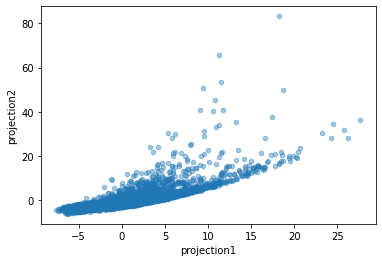


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 1:



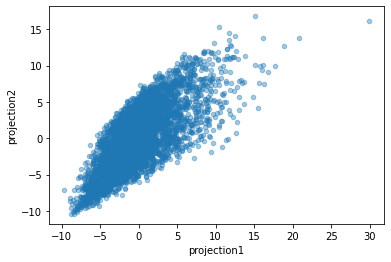


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 2:



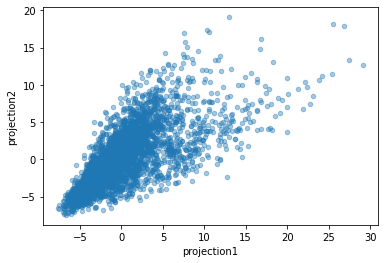


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 3:



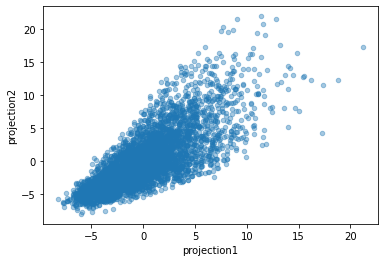


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 4:



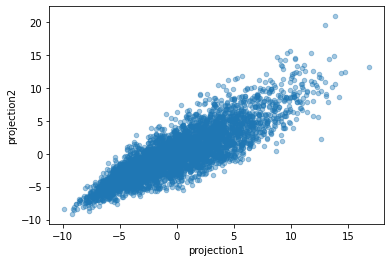


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 5:



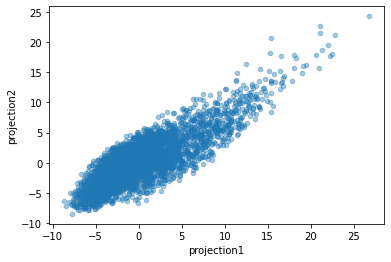


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 6:



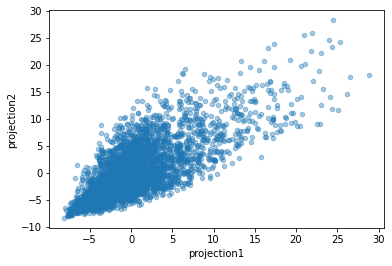


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 7:



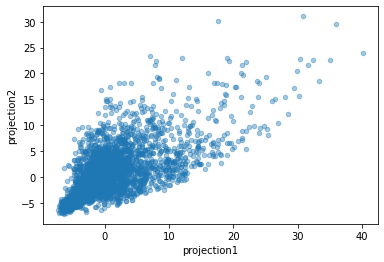


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 8:



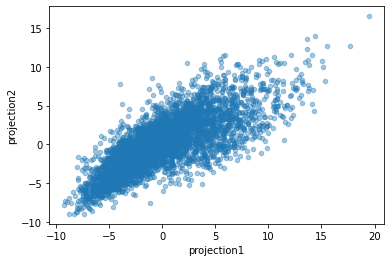


Scatter Plot between Projected Component 1 and Projected Component 2 for digit label 9:



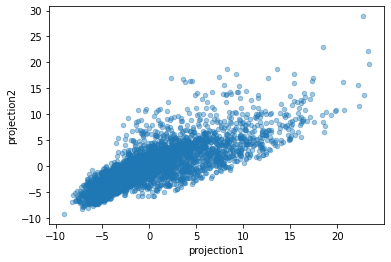

In [17]:

#uniq_categories is an array with unique digit label values from 0 to 9.
uniq_categories=sorted(data.label.unique())

#create PCA instance (object)
pca_instance=PCA(data, 0)  ## 0 is the column index of labels in the data.

'''
Loop on the subset of label filtered by the unique digit label.
'''

for i in range(len(uniq_categories)):
    
    # use class method `cov_mat` to get the scaled feature data and its covariance matrix.
    scaled_dat, cov_mat=pca_instance.cov_mat(uniq_categories[i]) 
    
    #get the top two projections that captures maximum variance in covariance matrix of the data.
    projecteddata=pca_instance.get_projected_data(scaled_dat, cov_mat)
    
    print("\nScatter Plot between Projected Component 1 and Projected Component 2 for digit label " 
          + str(uniq_categories[i]) + ":\n")
    projecteddata.plot(kind="scatter", x= "projection1", y= "projection2", alpha=0.4)
    plt.show()

Projected Data is a dimensionally reduced data set that can be consumed further for analysis and deriving insights.
 